# Bayesian Network for Fire Alarm

## Part II

### Implementation of the Bayesian Network

### Importing necessary libraries

In [1]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork
import networkx as nx

### Defining network structure

In [2]:
fire_model = BayesianNetwork([('Faulty', 'Alarm'),
                              ('Fire', 'Alarm'),
                              ('Fire', 'Smoke'),
                              ('Alarm', 'Evacuation'),
                              ('Alarm', 'Alert')])

### Depiction of the Bayesian Network

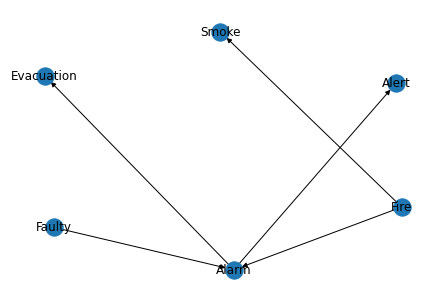

In [3]:
nx.draw(fire_model, with_labels=True)

### Define conditional probability distributions (CPD)

In [4]:
# Probability of a faulty alarm (True, False)
faulty_cpd = TabularCPD(
    variable = 'Faulty',
    variable_card = 2,   # cardinality
    values = [[0.02], [0.98]],
    state_names={'Faulty': ['Yes', 'No']})

In [5]:
# Probability of fire (True, False)
fire_cpd = TabularCPD(
    variable = 'Fire',
    variable_card = 2,
    values = [[.01], [.99]],
    state_names={'Fire': ['Yes', 'No']}) 

In [6]:
# Probability of fire alarm going off given a tampering and/or fire
alarm_cpd = TabularCPD(
    variable = 'Alarm',
    variable_card = 2,
    values = [[.5, .9, .99, .0001],
              [.5, .1, .01, .9999]],
    evidence = ['Faulty', 'Fire'],
    evidence_card = [2,2],
    state_names={'Alarm': ['Yes', 'No'],
                 'Faulty': ['Yes', 'No'],
                 'Fire': ['Yes', 'No']})

In [7]:
# Probability of smoke given fire or no fire
smoke_cpd = TabularCPD(
    variable='Smoke',
    variable_card=2,
    values=[[0.9, 0.01], 
            [0.1, 0.99]],
    evidence=['Fire'], 
    evidence_card=[2],
    state_names={'Smoke': ['Yes', 'No'],
                'Fire': ['Yes', 'No']})

In [8]:
# Proabability of alerting the first responders in case of fire or no fire
alert_cpd = TabularCPD(
    variable='Alert', 
    variable_card=2,
    values=[[0.8, 0.01], 
            [0.2, 0.99]],
    evidence=['Alarm'], 
    evidence_card=[2],
    state_names={'Alert': ['Yes', 'No'],
                'Alarm': ['Yes', 'No']})

In [9]:
# Probability of evacuating given fire alarm going off or not
evacuation_cpd = TabularCPD(
    variable='Evacuation', 
    variable_card=2,
    values=[[0.88, 0.001], 
            [0.12, 0.999]],
    evidence=['Alarm'], 
    evidence_card=[2],
    state_names={'Evacuation': ['Yes', 'No'],
                'Alarm': ['Yes', 'No']})

### Add the CPDs to the network

In [10]:
fire_model.add_cpds(faulty_cpd, fire_cpd, smoke_cpd, alert_cpd, alarm_cpd, evacuation_cpd)

### Checking if the model is valid and the probabilities add up to 1

In [11]:
# Check if the model is valid and throw an exception otherwise
fire_model.check_model()

True

In [12]:
fire_model.get_cpds()

[<TabularCPD representing P(Faulty:2) at 0x2a3efc7e288>,
 <TabularCPD representing P(Fire:2) at 0x2a3efe23688>,
 <TabularCPD representing P(Smoke:2 | Fire:2) at 0x2a3efe267c8>,
 <TabularCPD representing P(Alert:2 | Alarm:2) at 0x2a3efe26e08>,
 <TabularCPD representing P(Alarm:2 | Faulty:2, Fire:2) at 0x2a3efe26188>,
 <TabularCPD representing P(Evacuation:2 | Alarm:2) at 0x2a3efe33488>]

### Print probability distributions for each node

In [13]:
for cpd in fire_model.get_cpds():
    print("CPD of {variable}:".format(variable = cpd.variable))
    print(cpd)

CPD of Faulty:
+-------------+------+
| Faulty(Yes) | 0.02 |
+-------------+------+
| Faulty(No)  | 0.98 |
+-------------+------+
CPD of Fire:
+-----------+------+
| Fire(Yes) | 0.01 |
+-----------+------+
| Fire(No)  | 0.99 |
+-----------+------+
CPD of Smoke:
+------------+-----------+----------+
| Fire       | Fire(Yes) | Fire(No) |
+------------+-----------+----------+
| Smoke(Yes) | 0.9       | 0.01     |
+------------+-----------+----------+
| Smoke(No)  | 0.1       | 0.99     |
+------------+-----------+----------+
CPD of Alert:
+------------+------------+-----------+
| Alarm      | Alarm(Yes) | Alarm(No) |
+------------+------------+-----------+
| Alert(Yes) | 0.8        | 0.01      |
+------------+------------+-----------+
| Alert(No)  | 0.2        | 0.99      |
+------------+------------+-----------+
CPD of Alarm:
+------------+-------------+-------------+------------+------------+
| Faulty     | Faulty(Yes) | Faulty(Yes) | Faulty(No) | Faulty(No) |
+------------+------------

### Active trail nodes

To find the path of influence of a particular node

In [14]:
fire_model.active_trail_nodes('Fire')

{'Fire': {'Alarm', 'Alert', 'Evacuation', 'Fire', 'Smoke'}}

"Faulty" is not part of this path as a faulty detector is not dependent on fire occuring.

In [15]:
fire_model.active_trail_nodes('Alert')

{'Alert': {'Alarm', 'Alert', 'Evacuation', 'Faulty', 'Fire', 'Smoke'}}

An alert is influenced by all the nodes in the network

### Local independencies

In [16]:
fire_model.local_independencies('Smoke') 

(Smoke ⟂ Alarm, Faulty, Evacuation, Alert | Fire)

Smoke is independent of any faulty alarm, the alarm going off and the people evacuating the building when we have information about the fire 

In [17]:
fire_model.local_independencies('Fire') 

(Fire ⟂ Faulty)

Here, Fire is independent of a faulty alarm system because a real fire would not be caused due to faulty detector.

### All independencies

In [18]:
fire_model.get_independencies()    

(Alarm ⟂ Smoke | Fire)
(Alarm ⟂ Smoke | Alert, Fire)
(Alarm ⟂ Smoke | Faulty, Fire)
(Alarm ⟂ Smoke | Evacuation, Fire)
(Alarm ⟂ Smoke | Alert, Faulty, Fire)
(Alarm ⟂ Smoke | Alert, Evacuation, Fire)
(Alarm ⟂ Smoke | Faulty, Evacuation, Fire)
(Alarm ⟂ Smoke | Alert, Faulty, Evacuation, Fire)
(Alert ⟂ Faulty, Evacuation, Fire, Smoke | Alarm)
(Alert ⟂ Smoke | Fire)
(Alert ⟂ Smoke, Evacuation, Fire | Alarm, Faulty)
(Alert ⟂ Faulty, Evacuation, Fire | Alarm, Smoke)
(Alert ⟂ Faulty, Smoke, Fire | Alarm, Evacuation)
(Alert ⟂ Faulty, Evacuation, Smoke | Alarm, Fire)
(Alert ⟂ Smoke | Faulty, Fire)
(Alert ⟂ Smoke | Evacuation, Fire)
(Alert ⟂ Evacuation, Fire | Alarm, Faulty, Smoke)
(Alert ⟂ Smoke, Fire | Alarm, Faulty, Evacuation)
(Alert ⟂ Smoke, Evacuation | Alarm, Faulty, Fire)
(Alert ⟂ Faulty, Fire | Alarm, Evacuation, Smoke)
(Alert ⟂ Faulty, Evacuation | Alarm, Smoke, Fire)
(Alert ⟂ Faulty, Smoke | Alarm, Evacuation, Fire)
(Alert ⟂ Smoke | Faulty, Evacuation, Fire)
(Alert ⟂ Fire | Alarm, Eva

### Querying the Bayesian network

In [19]:
# To make probabilistic inferences using Variable elimination
from pgmpy.inference import VariableElimination

In [20]:
fire_infer = VariableElimination(fire_model)

# Question 1

### Will the residents evacuate the building in case of smoke ?

In [21]:
# Probability of evacuating the building given smoke 
prob_evacuation_smoke = fire_infer.query(
    variables = ['Evacuation'],
    evidence ={'Smoke':'Yes'})
print(prob_evacuation_smoke)  

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------+-------------------+
| Evacuation      |   phi(Evacuation) |
+=================+===================+
| Evacuation(Yes) |            0.4196 |
+-----------------+-------------------+
| Evacuation(No)  |            0.5804 |
+-----------------+-------------------+


From the above result, we see that there is a higher chance that people will evacuate the building when there is smoke when compared to a situation when there is no smoke as shown below.

In [22]:
# Probability of evacuating the building given no smoke 
prob_evacuation_no_smoke = fire_infer.query(
    variables = ['Evacuation'],
    evidence ={'Smoke':'No'})
print(prob_evacuation_no_smoke)  

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------+-------------------+
| Evacuation      |   phi(Evacuation) |
+=================+===================+
| Evacuation(Yes) |            0.0178 |
+-----------------+-------------------+
| Evacuation(No)  |            0.9822 |
+-----------------+-------------------+


# Question 2

### Will the security guard alert the fire department in case of people evacuating?

In [23]:
prob_alert_evac = fire_infer.query(
    variables = ['Alert'],
    evidence ={'Evacuation':'Yes'})
print(prob_alert_evac)  

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------------+--------------+
| Alert      |   phi(Alert) |
+============+==============+
| Alert(Yes) |       0.7697 |
+------------+--------------+
| Alert(No)  |       0.2303 |
+------------+--------------+


From the above result, we see that there is a high chance that the security guard will alert the fire department when he notices people evacuating the building.

# Question 3

## Will the security alert the fire department if the alarm was caused due to a faulty detector?

In [24]:
prob_alert_faulty = fire_infer.query(
    variables = ['Alert'],
    evidence ={'Faulty':'Yes'})
print(prob_alert_faulty)  

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+------------+--------------+
| Alert      |   phi(Alert) |
+============+==============+
| Alert(Yes) |       0.7178 |
+------------+--------------+
| Alert(No)  |       0.2822 |
+------------+--------------+


From the above result, we see that there is a high chance that the security guard will alert the fire department when the alarm has gone off due to a faulty detector.